# What is Corona Virus(COVID-19)?

**Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. 
This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the india.**

# History of COVID-19 in India

**On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China. No significant rise in cases was seen in the rest of February. On 4 March 22 new cases were reported, including 14 infected members of an Italian tourist group**

**On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi.The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities.Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.**

**The transmission escalated during March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country.On 4 March, 22 new cases came to light, including those of an Italian tourist group with 14 infected members.But number of cases start increasing dramtically after 19th March, but in the month of April it has been its peak.**

**Experts suggest the number of infections could be much higher as India's testing rates are among the lower side in the world.**


- Major events of the COVID-19 pandemic in India until April

| Date | Events |
| :-| :-|
| 30 January |	First confirmed case |
| 04 March |	Mandatory International passenger screenings at all airports"Mandatory screenings". |
| 12 March |	First confirmed death |
| 13 March |	Suspension of non-essential traveller visas |
| 15 March |	100 confirmed cases |
| 16 March |	Passenger land border crossing suspended |
| 22 March |	One day Janata Curfew, Passenger air travel suspended till further notice |
| 25 March |	Nationwide lock-down imposed till 14 April |
| 28 March |	1,000 confirmed cases |
| 30 March |	100 confirmed recoveries |
| 05 April | 	100 confirmed deaths |
| 14 April |	10,000 confirmed cases, Nationwide lock-down extended till 3 May |
| 13 April |	1,000 confirmed recoveries |
| 19 April |	500 confirmed deaths |
| 25 April |	5,000 confirmed recoveries |

- Major events of COVID-19 pandemic in India since 30 April

| Date | Events |
| :-| :-|
| 1 May |   Nationwide lock-down further extended till 17 May |
| 2 May |	10,000 confirmed recoveries |
| 7 May |	50,000 confirmed cases |
| 10 May |	2,000 confirmed deaths |
| 11 May |	20,000 confirmed recoveries |
| 17 May |	Nationwide lockdown further extended till 31 May |
| 19 May |	100,000 confirmed cases |
| 23 May |	50,000 confirmed recoveries |
| 27 May |	150,000 confirmed cases |
| 30 May |	Lockdown extended in containment zones till 30 June |
| 31 May |	5,000 confirmed deaths |
| 3 June |	100,000 confirmed recoveries |
| 10 June |	Reported recoveries surpassed active cases |
| 13 June |	300,000 confirmed cases |
| 17 June |	10,000 confirmed deaths |

Source: Wikipedia

# Library

In [1]:
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta

import numpy as np 
import pandas as pd 
from IPython.display import Markdown

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import altair as alt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
from plotly.offline import init_notebook_mode, iplot 
import plotly.offline as py
import plotly.express as ex
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
from fbprophet import Prophet
pd.set_option('display.max_rows', None)
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/cleaned2020_07_12.csv
data/cleaned2020_07_13.csv
data/patients_data.csv
data/tests_day_wise.csv
data/2020_07_12.csv
data/2020_07_13.csv
data/2020_07_11.csv
data/state_level_latest.csv
data/nation_level_daily.csv
data/district_level_latest.csv
data/state_level_daily.csv
data/tests_state_wise.csv


# Data Extraction

In [2]:
link = 'https://www.mohfw.gov.in/'
req = request('GET', url=link)
soup = BeautifulSoup(req.content, "html.parser")
thead = soup.find_all('thead')[-1]
head = thead.find_all('tr')
tbody = soup.find_all('tbody')[-1]
body = tbody.find_all('tr')
head_rows = []
body_rows = []
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)   
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
df_bs = pd.DataFrame(body_rows[:len(body_rows)-1], columns=head_rows[0])   
df_bs.drop('S. No.', axis=1, inplace=True)

#To remove last raw
df_bs.drop(df_bs.tail(5).index,axis = 0,inplace=True)

now  = datetime.now()
df_bs['Date'] = now.strftime("%m/%d/%Y") 
df_bs['Date'] = pd.to_datetime(df_bs['Date'], format='%m/%d/%Y')
df_bs.rename(columns = {'Deaths**':'Deceased','Cured/Discharged/Migrated*':'Cured/Discharged/Migrated',
                       'Active Cases*':'Active Cases','Total Confirmed cases*':'Total Confirmed Cases'},inplace = True)

In [3]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [4]:
lat = {'Delhi':28.7041,
       'Haryana':29.0588,
       'Kerala':10.8505,
       'Rajasthan':27.0238,
       'Telengana':18.1124,
       'Uttar Pradesh':26.8467,
       'Ladakh':34.2996,
       'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782,
       'Punjab':31.1471,
       'Karnataka':15.3173,
       'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 
       'Odisha':20.9517, 
       'Uttarakhand':30.0668, 
       'West Bengal':22.9868, 
       'Puducherry': 11.9416, 
       'Chandigarh': 30.7333, 
       'Chhattisgarh':21.2787, 
       'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 
       'Madhya Pradesh': 22.9734, 
       'Bihar': 25.0961, 
       'Manipur':24.6637,
       'Mizoram':23.1645,
       'Goa':15.2993,
       'Andaman and Nicobar Islands':11.7401,
       'Jharkhand' : 23.6102,
       'Arunachal Pradesh': 28.2180,
       'Assam' : 26.2006,
       'Tripura':23.9408,
       'Meghalaya':25.4670,
       'Nagaland':26.1584,
       'Dadra and Nagar Haveli and Daman and Diu': 20.1809,
       'Sikkim': 27.5330,
       'Lakshadweep':10.5667,
       'Telangana': 18.1124,
       'State Unassigned':20.5937
      }

long = {'Delhi':77.1025,
        'Haryana':76.0856,
        'Kerala':76.2711,
        'Rajasthan':74.2179,
        'Telengana':79.0193,
        'Uttar Pradesh':80.9462,
        'Ladakh':78.2932,
        'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762,
        'Punjab':75.3412,
        'Karnataka':75.7139,
        'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 
        'Odisha':85.0985, 
        'Uttarakhand':79.0193, 
        'West Bengal':87.8550, 
        'Puducherry': 79.8083, 
        'Chandigarh': 76.7794, 
        'Chhattisgarh':81.8661, 
        'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 
        'Madhya Pradesh': 78.6569, 
        'Bihar': 85.3131, 
        'Manipur':93.9063,
        'Mizoram':92.9376,
        'Goa':74.1240,
        'Jharkhand' : 85.2799,
        'Andaman and Nicobar Islands':92.6586,
        'Arunachal Pradesh' :94.7278,
        'Assam' : 92.9376,
        'Tripura':91.9882,
        'Meghalaya':91.3662,
        'Nagaland':94.5624,
        'Dadra and Nagar Haveli and Daman and Diu':73.0169,
        'Sikkim': 88.5122,
        'Lakshadweep':72.6417,
        'Telangana': 79.0193,
        'State Unassigned':78.9629
       }

df_bs['Latitude'] = df_bs['Name of State / UT'].map(lat)
df_bs['Longitude'] = df_bs['Name of State / UT'].map(long)

In [5]:
df_bs.info()
df_bs.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 8 columns):
Name of State / UT           35 non-null object
Active Cases                 35 non-null object
Cured/Discharged/Migrated    35 non-null object
Deceased                     35 non-null object
Total Confirmed Cases        35 non-null object
Date                         35 non-null datetime64[ns]
Latitude                     35 non-null float64
Longitude                    35 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.5+ KB


Index(['Name of State / UT', 'Active Cases', 'Cured/Discharged/Migrated',
       'Deceased', 'Total Confirmed Cases', 'Date', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
cols = ['Active Cases', 'Cured/Discharged/Migrated', 'Deceased', 'Total Confirmed Cases']
df_bs[cols] = df_bs[cols].astype('int') 
df_bs.columns = map(str.lower, df_bs.columns)

In [7]:
# complete data
file_name = now.strftime("%Y_%m_%d")+'.csv'
file_loc = 'data/'
df_bs.to_csv(file_loc + file_name, index=False)

In [8]:
def read_from_api(URL, x=None):
    """
    Read data from API and Return Normalized JSON
    
    Keyword arguments:
    URL -- String API URL
    x -- String name to normalize API request into JSON
    """
    response = request(url=URL, method='get')
    elevations = response.json()
    return json_normalize(elevations) if x==None else json_normalize(elevations[x])

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

### Patient level raw data

In [10]:
# patient level raw data
df_raw_data1 = read_from_api('https://api.covid19india.org/raw_data1.json', 'raw_data')
df_raw_data2 = read_from_api('https://api.covid19india.org/raw_data2.json', 'raw_data')
df_raw_data3 = read_from_api('https://api.covid19india.org/raw_data3.json', 'raw_data')
df_raw_data4 = read_from_api('https://api.covid19india.org/raw_data4.json', 'raw_data')
df_raw_data5 = read_from_api('https://api.covid19india.org/raw_data5.json', 'raw_data')
df_raw_data6 = read_from_api('https://api.covid19india.org/raw_data6.json', 'raw_data')
df_raw_data7 = read_from_api('https://api.covid19india.org/raw_data7.json', 'raw_data')
df_raw_data8 = read_from_api('https://api.covid19india.org/raw_data8.json', 'raw_data')
df_raw_data9 = read_from_api('https://api.covid19india.org/raw_data9.json', 'raw_data')

# concatenate dfs
df_raw_data = pd.concat([df_raw_data1, df_raw_data2, df_raw_data3, df_raw_data4, df_raw_data5, df_raw_data6,
                       df_raw_data7, df_raw_data8, df_raw_data9])

In [11]:
# first few rows
df_raw_data.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,,...,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,,...,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [12]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168148 entries, 0 to 22298
Data columns (total 22 columns):
agebracket                             168148 non-null object
backupnotes                            28183 non-null object
contractedfromwhichpatientsuspected    168148 non-null object
currentstatus                          168148 non-null object
dateannounced                          168148 non-null object
detectedcity                           168148 non-null object
detecteddistrict                       168148 non-null object
detectedstate                          168148 non-null object
entryid                                139965 non-null object
estimatedonsetdate                     28183 non-null object
gender                                 168148 non-null object
nationality                            168148 non-null object
notes                                  168148 non-null object
numcases                               168148 non-null object
patientnumber           

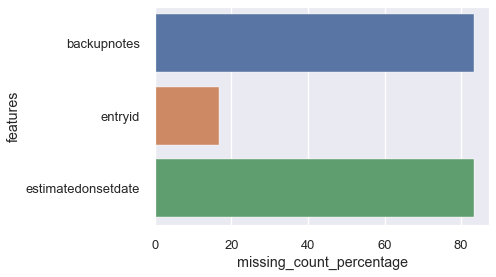

In [13]:
missing = df_raw_data.isnull().sum()[df_raw_data.isnull().sum() !=0]
missing = pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'}, inplace = True)
missing['missing_count_percentage'] = ((missing['missing_count'])/df_raw_data.shape[0])*100
plt.figure()
sns.barplot(y = missing['features'], x = missing['missing_count_percentage'])

In [14]:
missing_data(df_raw_data)

,Total,Percent
backupnotes,139965,83.23917
estimatedonsetdate,139965,83.23917
entryid,28183,16.76083
typeoftransmission,0,0.00000
statuschangedate,0,0.00000
contractedfromwhichpatientsuspected,0,0.00000
currentstatus,0,0.00000
dateannounced,0,0.00000
detectedcity,0,0.00000
detecteddistrict,0,0.00000


In [15]:
df_raw_data['agebracket'] = df_raw_data['agebracket'].replace('28-35', 35)
df_raw_data['agebracket'] = df_raw_data['agebracket'].replace('18-28', 28)
# df_raw_data['agebracket'] = df_raw_data['agebracket'].replace('', 0).fillna(0)
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')

In [16]:
df_raw_data['entryid'] = df_raw_data['entryid'].str.replace('', '0').fillna(0).astype('int')
df_raw_data.drop(['backupnotes','estimatedonsetdate'], axis=1, inplace = True)

In [17]:
numeric_cols = ['agebracket', 'entryid', 'numcases', 'patientnumber']
for i in numeric_cols:
    df_raw_data[i] = pd.to_numeric(df_raw_data[i], errors='coerce')


In [18]:
cols = ['currentstatus','detectedstate','gender','notes','statecode','typeoftransmission']
df_raw_data[cols] = df_raw_data[cols].astype('category')

In [19]:
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])
df_raw_data['statuschangedate']= pd.to_datetime(df_raw_data['statuschangedate'])

In [20]:
str_cols = ['contractedfromwhichpatientsuspected','dateannounced', 'detectedcity', 'detecteddistrict', 
       'nationality', 'notes', 'source1', 'source2', 'source3','statepatientnumber', 'statuschangedate']
df_raw_data[str_cols] = df_raw_data[str_cols].astype('str')

In [21]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168148 entries, 0 to 22298
Data columns (total 20 columns):
agebracket                             72454 non-null float64
contractedfromwhichpatientsuspected    168148 non-null object
currentstatus                          168148 non-null category
dateannounced                          168148 non-null object
detectedcity                           168148 non-null object
detecteddistrict                       168148 non-null object
detectedstate                          168148 non-null category
entryid                                168148 non-null int64
gender                                 168148 non-null category
nationality                            168148 non-null object
notes                                  168148 non-null object
numcases                               167932 non-null float64
patientnumber                          99793 non-null float64
source1                                168148 non-null object
source2         

In [22]:
# save to csv`
df_raw_data.to_csv('data/patients_data.csv', index=False)

### National Level : Time series data

In [23]:
df_cases_time_series = read_from_api('https://api.covid19india.org/data.json','cases_time_series')
df_cases_time_series.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
160,25561,492,19508,08 July,769057,21147,476554
161,25790,479,19408,09 July,794847,21626,495962
162,27762,520,20289,10 July,822609,22146,516251
163,27757,543,19981,11 July,850366,22689,536232
164,29105,500,18198,12 July,879471,23189,554430


In [24]:
df_cases_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
dailyconfirmed    165 non-null object
dailydeceased     165 non-null object
dailyrecovered    165 non-null object
date              165 non-null object
totalconfirmed    165 non-null object
totaldeceased     165 non-null object
totalrecovered    165 non-null object
dtypes: object(7)
memory usage: 9.1+ KB


In [25]:
cols = ['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'totalconfirmed', 'totaldeceased', 'totalrecovered']
df_cases_time_series[cols] = df_cases_time_series[cols].astype('int')

In [26]:
df_cases_time_series.to_csv('data/nation_level_daily.csv', index=False)

### National Level : State-wise stats data

In [27]:
df_statewise = read_from_api('https://api.covid19india.org/data.json','statewise')

In [28]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
active             38 non-null object
confirmed          38 non-null object
deaths             38 non-null object
deltaconfirmed     38 non-null object
deltadeaths        38 non-null object
deltarecovered     38 non-null object
lastupdatedtime    38 non-null object
migratedother      38 non-null object
recovered          38 non-null object
state              38 non-null object
statecode          38 non-null object
statenotes         38 non-null object
dtypes: object(12)
memory usage: 3.6+ KB


In [29]:
cols = ['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'migratedother', 'recovered']
df_statewise[cols] = df_statewise[cols].astype('int')
df_statewise['lastupdatedtime']= pd.to_datetime(df_statewise['lastupdatedtime'])
df_statewise.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,301482,879487,23194,21,7,0,2020-07-13 10:39:06,382,554429,Total,TT,
1,103516,254427,10289,0,0,0,2020-12-07 19:07:08,297,140325,Maharashtra,MH,297 cases were marked as non-covid deaths in M...
2,46972,138470,1966,0,0,0,2020-12-07 22:08:10,0,89532,Tamil Nadu,TN,2 deaths cross notified to other states from C...
3,19155,112494,3371,0,0,0,2020-12-07 18:22:07,0,89968,Delhi,DL,Delhi bulletins contain the counts for the pre...
4,10662,41906,2046,0,0,0,2020-12-07 19:41:34,0,29198,Gujarat,GJ,


In [30]:
df_statewise.to_csv('data/state_level_latest.csv', index=False)

### State Level : Daily changes data

In [31]:
# read data
state_wise_daily = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

# melt dataframe
state_wise_daily = state_wise_daily.melt(id_vars=['Date', 'Status'], 
                                         value_vars=state_wise_daily.columns[2:], 
                                         var_name='State', value_name='Count')

# pivot table
state_wise_daily = state_wise_daily.pivot_table(index=['Date', 'State'], 
                                                columns=['Status'], 
                                                values='Count').reset_index()
# latest = []
# latest['State_code'] = ['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD', 'DL', 'DN', 'GA',
#        'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML',
#        'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN',
#        'TR', 'TT', 'UN', 'UP', 'UT', 'WB']
# latest['State'] = ['Andaman and Nicobar','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh',
#                    'Chhattisgarh','Daman and Diu','Dadra and Nagar Haveli','Delhi','Goa','Gujarat',
#                    'Himachal Pradesh','Haryana','Jharkhand','Jammu and Kashmir','Karnataka','Kerala','Ladakh',
#                    'Lakshadweep','Maharashtra','Manipur','Meghalaya','Mizoram','Madhya Pradesh','Nagaland',
#                    'Odisha','Puducherry','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telengana','Tripura',
#                    'Uttar Pradesh','Uttarakhand','West Bengal']
# # map state names to state codes
# state_codes = {code:state for code, state in zip(latest['State_code'], latest['State'])}
# # state_codes['DD'] = 'Daman and Diu'
# state_wise_daily['State_Name'] = state_wise_daily['State'].map(state_codes)
# state_wise_daily['Date']= pd.to_datetime(state_wise_daily['Date'])

state_wise_daily.columns = map(str.lower, state_wise_daily.columns)
# save as a .csv file
state_wise_daily.to_csv('data/state_level_daily.csv')

# first few rows
state_wise_daily.head()

,date,state,confirmed,deceased,recovered
0,01-Apr-20,AN,0,0,0
1,01-Apr-20,AP,67,0,1
2,01-Apr-20,AR,0,0,0
3,01-Apr-20,AS,15,0,0
4,01-Apr-20,BR,3,0,0


### State Level : has district-wise  data

In [32]:
# read data
district_wise = pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')
district_wise.columns = map(str.lower, district_wise.columns)

# save as .csv file
district_wise['last_updated']= pd.to_datetime(district_wise['last_updated'], errors='coerce')
district_wise.to_csv('data/district_level_latest.csv', index=False)

# first few rows
district_wise.head()

,slno,state_code,state,district_key,district,confirmed,active,recovered,deceased,migrated_other,delta_confirmed,delta_active,delta_recovered,delta_deceased,district_notes,last_updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,2329,2329,0,0,0,-666,-666,0,0,NaN,NaT
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaT
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaT
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,NaN,NaT
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,429,106,323,0,0,0,0,0,0,NaN,NaT


### National Level : Test counts data

In [33]:
# read data
tests_day_wise = pd.read_csv('https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv')
tests_day_wise.columns = map(str.lower, tests_day_wise.columns)
# tests_day_wise['update time stamp'] = pd.to_datetime(tests_day_wise['update time stamp'])
tests_day_wise['tested as of'] = pd.to_datetime(tests_day_wise['tested as of'])
tests_day_wise['total positive cases'] = pd.to_numeric(tests_day_wise['total positive cases'],errors='coerce')
tests_day_wise['sample reported today'] = pd.to_numeric(tests_day_wise['sample reported today'],errors='coerce')
# save as .csv file
tests_day_wise.to_csv('data/tests_day_wise.csv', index=False)

# first few rows
tests_day_wise.head()

,update time stamp,tested as of,total samples tested,total individuals tested,total positive cases,tests conducted by private labs,sample reported today,positive cases from samples reported,source,source 1,test positivity rate,individuals tested per confirmed case,tests per confirmed case,tests per million
0,13/03/2020 00:00:00,2020-03-13,6500.0,5900.0,78.0,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.20%,75.64,83.33,5.0
1,18/03/2020 18:00:00,2020-03-18,13125.0,12235.0,150.0,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.14%,81.57,87.50,10.0
2,19/03/2020 10:00:00,2020-03-19,13316.0,12426.0,168.0,NaN,NaN,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,1.26%,73.96,79.26,10.0
3,19/03/2020 18:00:00,2020-03-19,14175.0,13285.0,182.0,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.28%,72.99,77.88,11.0
4,20/03/2020 10:00:00,2020-03-20,14376.0,13486.0,206.0,NaN,NaN,NaN,ICMR_website_update_20March_10AM_IST.pdf,NaN,1.43%,65.47,69.79,11.0


### State Level : Testing data

In [34]:
# read data
tests_state_wise = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
tests_state_wise.columns = map(str.lower, tests_state_wise.columns)
tests_state_wise['updated on'] = pd.to_datetime(tests_state_wise['updated on'])
# save as .csv file
tests_state_wise.to_csv('data/tests_state_wise.csv', index=False)

# first few rows
tests_state_wise.head(3)

,updated on,state,total tested,tag (total tested),positive,negative,unconfirmed,cumulative people in quarantine,total people currently in quarantine,tag (people in quarantine),...,corona enquiry calls,num calls state helpline,source1,source2,source3,test positivity rate,tests per thousand,tests per million,tests per positive case,population ncp 2019 projection
0,2020-04-17,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210,181.0,NaN,NaN,NaN,...,NaN,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,NaN,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,NaN,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0


# Data Cleaning

In [35]:
missing_data(df_bs)

,Total,Percent
longitude,0,0.0
latitude,0,0.0
date,0,0.0
total confirmed cases,0,0.0
deceased,0,0.0
cured/discharged/migrated,0,0.0
active cases,0,0.0
name of state / ut,0,0.0


In [36]:
df_bs['mortality_rate'] = df_bs['deceased']/df_bs['total confirmed cases']
df_bs['recovery_rate'] = df_bs['cured/discharged/migrated']/df_bs['total confirmed cases']

In [37]:
file_name = 'cleaned'+now.strftime("%Y_%m_%d")+'.csv'
file_loc = 'data/'
df_bs.to_csv(file_loc + file_name, index=False)

In [38]:
total_cases = df_bs[['name of state / ut','date','total confirmed cases','deceased',
                                 'cured/discharged/migrated','active cases']]
total_cases['date'] = total_cases['date'].apply(pd.to_datetime, dayfirst=True)
total_cases = total_cases.groupby(["date"]).sum().reset_index()

total_cases.head()

,date,total confirmed cases,deceased,cured/discharged/migrated,active cases
0,2020-07-13,875896,23174,553471,299251


# **Overall view of the situation**

In [39]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',color_discrete_sequence = ex.colors.cyclical.IceFire
              ,title='Symptom of Coronavirus',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

In [40]:
total_tested = tests_day_wise['total samples tested'].max()
total_positive = tests_day_wise['total positive cases'].sum()
positivecase_ratio = total_positive * 100 / total_tested
pcr = float("{:.2f}".format(positivecase_ratio))
test_million = np.round(1000000*tests_day_wise['total samples tested'].max()/13000000000,2)
print('Total Number of people tested :', total_tested)
print('Total Number of positive cases :',total_positive)
print('Test Conducted per Million People :',test_million)
print('Positive case per Tests [%]:',pcr)
print('Total Recovered Cases :',df_bs['cured/discharged/migrated'].sum())
print('Total Deaths :',df_bs['deceased'].sum())

Total Number of people tested : 11806256.0
Total Number of positive cases : 188033.0
Test Conducted per Million People : 908.17
Positive case per Tests [%]: 1.59
Total Recovered Cases : 553471
Total Deaths : 23174


In [41]:
#Overall 
fig = go.Figure(data=[go.Pie(labels=['Total Samples Tested','Positive Cases from tested samples'],
                            values= [total_tested,total_positive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='COVID19 Test Results from ICMR in india',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [42]:
#Overall 
ac= df_bs['active cases'].sum()
rvd = df_bs['cured/discharged/migrated'].sum()
dth = df_bs['deceased'].sum()
fig = go.Figure(data=[go.Pie(labels=['Active','Recovered','Deceased'],
                             values= [ac,rvd,dth],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Current Situation in India according www.mohfw.gov.in',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [43]:
Total_confirmed = df_statewise['active'].sum()
Total_recovered =  df_statewise['recovered'].sum()
Total_death = df_statewise['deaths'].sum()
data = [['active', Total_confirmed], ['recovered', Total_recovered], ['deaths', Total_death]] 
df = pd.DataFrame(data, columns = ['state', 'count']) 
fig = px.pie(df,
             values= 'count',labels=['Active Cases','Cured','Death'],
             names="state",
             title="Real Time data from www.covid19india.org",
             template="seaborn")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=14,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_traces(textposition='inside')

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [44]:
from IPython.core.display import HTML
HTML(''' <iframe title="" aria-label="Interactive line chart" id="datawrapper-chart-kc9cP" src="https://datawrapper.dwcdn.net/kc9cP/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="400"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"])for(var e in a.data["datawrapper-height"]){var t=document.getElementById("datawrapper-chart-"+e)||document.querySelector("iframe[src*='"+e+"']");t&&(t.style.height=a.data["datawrapper-height"][e]+"px")}}))}();
</script> ''')